<a href="https://colab.research.google.com/github/Riana901/Sentiment-Analysis-E-Parking-Ponorogo-Using-BERT/blob/main/FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRE-PROCESSING DATA
Data Cleansing
- MissingValue Handling, Duplicate, Remove Symbol, emot, mention dll
- Slang Word-Stopword Removal link Referensi
kamus slang word: publication on the link: https://ieeexplore.ieee.org/abstract/document/8629151
- kamus stopword : Tala, F. Z. (2003). A Study of Stemming Effects on Information Retrieval in Bahasa Indonesia. M.Sc. Thesis. Master of Logic Project. Institute for Logic, Language and Computation. Universiteit van Amsterdam, The Netherlands.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap

# Torch ML libraries
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

# Misc.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/dataawal.csv", encoding='latin-1')
df.head()

,no,author,comment,apiVersion,script,id,name,likelyGender,genderScale,score,probabilityCalibrated
0,1,riyanatkinson,@ricardo_kneff kalau di jakarta e parking bias...,namsor_api_2.0.30,LATIN,e47edeb6-12ef-4672-86a2-3b5bd793a521,riyanatkinson,male,-0.354071,3.128930,0.677035
1,2,aeldy rn,"Bayar pakek gopay,dana opo sopipay?",namsor_api_2.0.30,LATIN,9636a1b4-ee98-4432-a1d7-acbb9ceb2d36,aeldy rn,female,0.066888,0.775960,0.533444
2,3,tatan t,Pembayaran paling gampang Jane gae Qris??,namsor_api_2.0.30,LATIN,e9f99de2-864a-428d-9f20-27edc0812443,tatan t,male,-0.512525,6.122138,0.756263
3,4,bandar absyar,Kalau gak di mulai tdk akan pernah mulai.. bis...,namsor_api_2.0.30,LATIN,5a177f21-f048-4be4-b657-db5bcde50dfa,bandar absyar,male,-0.788357,8.080020,0.894179
4,5,betina gemoy,Wkwk brharap parikir motor di seluruh Ponorogo...,namsor_api_2.0.30,LATIN,1c1a3eaf-7225-4928-9026-30d7ec02a1f4,betina gemoy,female,0.716831,7.413761,0.858415


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   no                     538 non-null    int64  
 1   author                 538 non-null    object 
 2   comment                535 non-null    object 
 3   apiVersion             538 non-null    object 
 4   script                 538 non-null    object 
 5   id                     538 non-null    object 
 6   name                   538 non-null    object 
 7   likelyGender           538 non-null    object 
 8   genderScale            538 non-null    float64
 9   score                  538 non-null    float64
 10  probabilityCalibrated  538 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 46.4+ KB


In [ ]:
df.isnull().sum()

,0
no,0
author,0
comment,3
apiVersion,0
script,0
id,0
name,0
likelyGender,0
genderScale,0
score,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

,0
no,0
author,0
comment,0
apiVersion,0
script,0
id,0
name,0
likelyGender,0
genderScale,0
score,0


In [ ]:
df.shape

(535, 11)

In [ ]:
import re
import string

# Fungsi untuk menghilangkan tanda baca
def clean_text(text):
    # Menghapus mention
    text = re.sub(r'@[^\s]+', '', text)
    # Menghapus emotikon
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)  # Hapus karakter astral (termasuk emotikon)
    # Menghapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Menghapus spasi di awal/akhir
    text = text.strip()
    return text

# Terapkan fungsi clean_text ke kolom 'comment'
df['comment'] = df['comment'].apply(clean_text)

# Ganti string kosong dengan NaN
df['comment'].replace('', np.nan, inplace=True)

# Hapus baris dengan NaN di kolom 'comment' jika diperlukan
df.dropna(subset=['comment'], inplace=True)

# Tampilkan DataFrame dan cek jumlah null di kolom 'comment'
print(df['comment'].isnull().sum())
df.head()


0


,no,author,comment,apiVersion,script,id,name,likelyGender,genderScale,score,probabilityCalibrated
0,1,riyanatkinson,kalau di jakarta e parking biasanya pakai e mo...,namsor_api_2.0.30,LATIN,e47edeb6-12ef-4672-86a2-3b5bd793a521,riyanatkinson,male,-0.354071,3.128930,0.677035
1,2,aeldy rn,Bayar pakek gopaydana opo sopipay,namsor_api_2.0.30,LATIN,9636a1b4-ee98-4432-a1d7-acbb9ceb2d36,aeldy rn,female,0.066888,0.775960,0.533444
2,3,tatan t,Pembayaran paling gampang Jane gae Qris,namsor_api_2.0.30,LATIN,e9f99de2-864a-428d-9f20-27edc0812443,tatan t,male,-0.512525,6.122138,0.756263
3,4,bandar absyar,Kalau gak di mulai tdk akan pernah mulai bismi...,namsor_api_2.0.30,LATIN,5a177f21-f048-4be4-b657-db5bcde50dfa,bandar absyar,male,-0.788357,8.080020,0.894179
4,5,betina gemoy,Wkwk brharap parikir motor di seluruh Ponorogo...,namsor_api_2.0.30,LATIN,1c1a3eaf-7225-4928-9026-30d7ec02a1f4,betina gemoy,female,0.716831,7.413761,0.858415


In [ ]:
# Menampilkan jumlah data yang kosong (NaN) di kolom 'comment'
print(df['comment'].isnull().sum())

0


In [ ]:
df.shape

(527, 11)

In [ ]:
# Stopword Removal
!wget https://raw.githubusercontent.com/masdevid/ID-Stopwords/master/id.stopwords.02.01.2016.txt
# Read stopwords file
with open('id.stopwords.02.01.2016.txt', 'r') as f:
    stopwords = f.read().splitlines()

# Function to remove stopwords
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords]
    return ' '.join(filtered_words)

# Apply stopword removal to the 'Comment' column
df['comment'] = df['comment'].apply(remove_stopwords)

# Display the DataFrame after stopword removal
df.head()

--2024-11-03 16:01:20--  https://raw.githubusercontent.com/masdevid/ID-Stopwords/master/id.stopwords.02.01.2016.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6446 (6.3K) [text/plain]
Saving to: ‘id.stopwords.02.01.2016.txt.7’

id.stopwords.02.01. 100%[===================>]   6.29K  --.-KB/s    in 0s      

2024-11-03 16:01:21 (33.8 MB/s) - ‘id.stopwords.02.01.2016.txt.7’ saved [6446/6446]



,no,author,comment,apiVersion,script,id,name,likelyGender,genderScale,score,probabilityCalibrated
0,1,riyanatkinson,jakarta e parking pakai e money flazz brizzi k...,namsor_api_2.0.30,LATIN,e47edeb6-12ef-4672-86a2-3b5bd793a521,riyanatkinson,male,-0.354071,3.128930,0.677035
1,2,aeldy rn,Bayar pakek gopaydana opo sopipay,namsor_api_2.0.30,LATIN,9636a1b4-ee98-4432-a1d7-acbb9ceb2d36,aeldy rn,female,0.066888,0.775960,0.533444
2,3,tatan t,Pembayaran gampang Jane gae Qris,namsor_api_2.0.30,LATIN,e9f99de2-864a-428d-9f20-27edc0812443,tatan t,male,-0.512525,6.122138,0.756263
3,4,bandar absyar,gak tdk bismillah bisaaa,namsor_api_2.0.30,LATIN,5a177f21-f048-4be4-b657-db5bcde50dfa,bandar absyar,male,-0.788357,8.080020,0.894179
4,5,betina gemoy,Wkwk brharap parikir motor Ponorogo Jawa Timur...,namsor_api_2.0.30,LATIN,1c1a3eaf-7225-4928-9026-30d7ec02a1f4,betina gemoy,female,0.716831,7.413761,0.858415


In [ ]:
with open('/content/_json_colloquial-indonesian-lexicon.txt', 'r') as f:
  slang_dict = {}
  for line in f:
    # Split only on the first colon to handle potential multiple colons in the value
    if ':' in line:
      key, value = line.strip().split(':', 1)
      slang_dict[key.strip()] = value.strip()

# Fungsi untuk mengganti kata slang dengan kata baku
def replace_slang(text):
  words = text.split()
  new_words = []
  for word in words:
    if word in slang_dict:
      new_words.append(slang_dict[word])
    else:
      new_words.append(word)
  return ' '.join(new_words)

df['comment'] = df['comment'].apply(replace_slang)

# Tampilkan DataFrame yang sudah diperbarui
print(df)

      no              author  \
0      1       riyanatkinson   
1      2            aeldy rn   
2      3             tatan t   
3      4       bandar absyar   
4      5       betina  gemoy   
..   ...                 ...   
533  534          Reni qm ol   
534  535     user nk zu no y   
535  536   adityapratama       
536  537        Chank fanaya   
537  538           Nastar      

                                               comment         apiVersion  \
0    jakarta e parking pakai e money flazz brizzi k...  namsor_api_2.0.30   
1                    Bayar pakek gopaydana opo sopipay  namsor_api_2.0.30   
2                     Pembayaran gampang Jane gae Qris  namsor_api_2.0.30   
3                             gak tdk bismillah bisaaa  namsor_api_2.0.30   
4    Wkwk brharap parikir motor Ponorogo Jawa Timur...  namsor_api_2.0.30   
..                                                 ...                ...   
533                         mendukung mu pal E parking  namsor_api_2.0.30   

In [ ]:
# Case Folding
df['comment'] = df['comment'].str.lower()
df.head()

,no,author,comment,apiVersion,script,id,name,likelyGender,genderScale,score,probabilityCalibrated
0,1,riyanatkinson,jakarta e parking pakai e money flazz brizzi k...,namsor_api_2.0.30,LATIN,e47edeb6-12ef-4672-86a2-3b5bd793a521,riyanatkinson,male,-0.354071,3.128930,0.677035
1,2,aeldy rn,bayar pakek gopaydana opo sopipay,namsor_api_2.0.30,LATIN,9636a1b4-ee98-4432-a1d7-acbb9ceb2d36,aeldy rn,female,0.066888,0.775960,0.533444
2,3,tatan t,pembayaran gampang jane gae qris,namsor_api_2.0.30,LATIN,e9f99de2-864a-428d-9f20-27edc0812443,tatan t,male,-0.512525,6.122138,0.756263
3,4,bandar absyar,gak tdk bismillah bisaaa,namsor_api_2.0.30,LATIN,5a177f21-f048-4be4-b657-db5bcde50dfa,bandar absyar,male,-0.788357,8.080020,0.894179
4,5,betina gemoy,wkwk brharap parikir motor ponorogo jawa timur...,namsor_api_2.0.30,LATIN,1c1a3eaf-7225-4928-9026-30d7ec02a1f4,betina gemoy,female,0.716831,7.413761,0.858415


In [ ]:
print(df['comment'].isnull().sum())

0


In [ ]:
df.shape

(527, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 527 entries, 0 to 537
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   no                     527 non-null    int64  
 1   author                 527 non-null    object 
 2   comment                527 non-null    object 
 3   apiVersion             527 non-null    object 
 4   script                 527 non-null    object 
 5   id                     527 non-null    object 
 6   name                   527 non-null    object 
 7   likelyGender           527 non-null    object 
 8   genderScale            527 non-null    float64
 9   score                  527 non-null    float64
 10  probabilityCalibrated  527 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 49.4+ KB


In [ ]:
df.to_csv('/content/DATA_cleaned.csv', index=False)

# DATA TRANSLATING
menjadi Bahasa Indonesia

In [ ]:
!pip install googletrans==3.1.0a0

In [ ]:
data = pd.read_csv('/content/DATA_cleaned.csv')
from googletrans import Translator

# Fungsi untuk menerjemahkan teks
def translate_text(text, target_lang="id"):
    translator = Translator()
    translated_text = translator.translate(text, src='jw', dest=target_lang).text
    return translated_text

# Create a copy of the 'comment' column for translation
translated_texts = []
for index, row in data.iterrows():
    comment_text = row['comment']  # Ambil teks dari kolom 'comment'
    translated_text = translate_text(comment_text)
    translated_texts.append(translated_text)

# Assign the translated texts to a new column or overwrite the original 'comment' column
data['comment'] = translated_texts  # Overwrite original 'comment' column with translated text

# Menampilkan DataFrame setelah penerjemahan
data.head()

,no,author,comment,apiVersion,script,id,name,likelyGender,genderScale,score,probabilityCalibrated
0,1,riyanatkinson,parkir e jakarta pakai e money flazz brizzi ka...,namsor_api_2.0.30,LATIN,e47edeb6-12ef-4672-86a2-3b5bd793a521,riyanatkinson,male,-0.354071,3.128930,0.677035
1,2,aeldy rn,bayar gopaydana atau sopipay,namsor_api_2.0.30,LATIN,9636a1b4-ee98-4432-a1d7-acbb9ceb2d36,aeldy rn,female,0.066888,0.775960,0.533444
2,3,tatan t,pembayaran mudah jane gae qris,namsor_api_2.0.30,LATIN,e9f99de2-864a-428d-9f20-27edc0812443,tatan t,male,-0.512525,6.122138,0.756263
3,4,bandar absyar,tidak ada bismillah yang bisa melakukannya,namsor_api_2.0.30,LATIN,5a177f21-f048-4be4-b657-db5bcde50dfa,bandar absyar,male,-0.788357,8.080020,0.894179
4,5,betina gemoy,wkwk brharap parikir motor Ponorogo Jawa Timur...,namsor_api_2.0.30,LATIN,1c1a3eaf-7225-4928-9026-30d7ec02a1f4,betina gemoy,female,0.716831,7.413761,0.858415


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   no                     527 non-null    int64  
 1   author                 527 non-null    object 
 2   comment                527 non-null    object 
 3   apiVersion             527 non-null    object 
 4   script                 527 non-null    object 
 5   id                     527 non-null    object 
 6   name                   527 non-null    object 
 7   likelyGender           527 non-null    object 
 8   genderScale            527 non-null    float64
 9   score                  527 non-null    float64
 10  probabilityCalibrated  527 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 45.4+ KB


In [ ]:
data.to_csv('DATA[INDO].csv', index=False)

Setelah Translating dgn bahasa indonesia(penulis melakukan pengecekan manual pada dataset untuk memperbaiki kesalahan translate secara manual kemudian disimpan di file dengan nama DATA[IND])

In [ ]:
data = pd.read_csv('/content/DATA[IND].csv')
from googletrans import Translator

# Fungsi untuk menerjemahkan teks
def translate_text(text, target_lang="en"):
    translator = Translator()
    translated_text = translator.translate(text, src='id', dest=target_lang).text
    return translated_text

# Create a copy of the 'comment' column for translation
translated_texts = []
for index, row in data.iterrows():
    comment_text = row['comment']  # Ambil teks dari kolom 'comment'
    translated_text = translate_text(comment_text)
    translated_texts.append(translated_text)

# Assign the translated texts to a new column or overwrite the original 'comment' column
data['comment'] = translated_texts  # Overwrite original 'comment' column with translated text

# Menampilkan DataFrame setelah penerjemahan
data.head()

,no,author,comment,apiVersion,script,id,name,likelyGender,genderScale,score,probabilityCalibrated
0,1,riyanatkinson,Jakarta parking using e money flash brizzi tol...,namsor_api_2.0.30,LATIN,e47edeb6-12ef-4672-86a2-3b5bd793a521,riyanatkinson,male,-0.354071,3.128930,0.677035
1,2,aeldy rn,pay gopay with shopeepay funds,namsor_api_2.0.30,LATIN,9636a1b4-ee98-4432-a1d7-acbb9ceb2d36,aeldy rn,female,0.066888,0.775960,0.533444
2,3,tatan t,Easiest payment using QRIS,namsor_api_2.0.30,LATIN,e9f99de2-864a-428d-9f20-27edc0812443,tatan t,male,-0.512525,6.122138,0.756263
3,4,bandar absyar,Bismillah you can,namsor_api_2.0.30,LATIN,5a177f21-f048-4be4-b657-db5bcde50dfa,bandar absyar,male,-0.788357,8.080020,0.894179
4,5,betina gemoy,hope motorbike parking Ponorogo East Java 1000km,namsor_api_2.0.30,LATIN,1c1a3eaf-7225-4928-9026-30d7ec02a1f4,betina gemoy,female,0.716831,7.413761,0.858415


In [ ]:
data.to_csv('DATA_ENG.csv', index=False)

# DATA LABELING
LABELLING DATA DENGAN KAMUS Inset
Fajri Koto, and Gemala Y. Rahmaningtyas "InSet Lexicon: Evaluation of a Word List for Indonesian Sentiment Analysis in Microblogs". IEEE in the 21st International Conference on Asian Language Processing (IALP), Singapore, December 2017.

The InSet Lexicon memiliki 3,609 kata positifand 6,609 kata negatif dengan pembobotan dari -5 sampai +5

Paper: https://www.researchgate.net/publication/321757985_InSet_Lexicon_Evaluation_of_a_Word_List_for_Indonesian_Sentiment_Analysis_in_Microblogs

In [ ]:
data_df = pd.read_csv('/content/DATA[IND].csv')

In [ ]:
data_df.head()

,no,author,comment,apiVersion,script,id,name,likelyGender,genderScale,score,probabilityCalibrated
0,1,riyanatkinson,parkir jakarta pakai emoney flazz brizzi kartu...,namsor_api_2.0.30,LATIN,e47edeb6-12ef-4672-86a2-3b5bd793a521,riyanatkinson,male,-0.354071,3.128930,0.677035
1,2,aeldy rn,bayar gopay dana sopipay,namsor_api_2.0.30,LATIN,9636a1b4-ee98-4432-a1d7-acbb9ceb2d36,aeldy rn,female,0.066888,0.775960,0.533444
2,3,tatan t,pembayaran termudah pakai qris,namsor_api_2.0.30,LATIN,e9f99de2-864a-428d-9f20-27edc0812443,tatan t,male,-0.512525,6.122138,0.756263
3,4,bandar absyar,bismillah bisaaa,namsor_api_2.0.30,LATIN,5a177f21-f048-4be4-b657-db5bcde50dfa,bandar absyar,male,-0.788357,8.080020,0.894179
4,5,betina gemoy,berharap parkir sepeda motor ponorogo jawa tim...,namsor_api_2.0.30,LATIN,1c1a3eaf-7225-4928-9026-30d7ec02a1f4,betina gemoy,female,0.716831,7.413761,0.858415


In [ ]:
import json
import pandas as pd

# Load the positive and negative lexicons
with open('/content/_json_inset-neg.txt', 'r', encoding='utf-8') as neg_file:
    neg_lexicon = json.load(neg_file)

with open('/content/_json_inset-pos.txt', 'r', encoding='utf-8') as pos_file:
    pos_lexicon = json.load(pos_file)

# Ensure the 'comment' column exists
if 'comment' not in data_df.columns:
    raise ValueError("The 'comment' column is not present in the dataset.")

# Function to calculate sentiment score based on INSET Lexicon
def calculate_sentiment(text, pos_lexicon, neg_lexicon):
    words = text.lower().split()
    score = 0
    for word in words:
        score += pos_lexicon.get(word, 0) + neg_lexicon.get(word, 0)
    return score

# Function to categorize sentiment based on the score
def categorize_sentiment(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply the functions to the 'comment' column
data_df['Sentiment_Score'] = data_df['comment'].apply(lambda x: calculate_sentiment(str(x), pos_lexicon, neg_lexicon))
data_df['Label'] = data_df['Sentiment_Score'].apply(categorize_sentiment)

# Save the labeled data
output_path = '/content/data_LABEL.csv'
data_df.to_csv(output_path, index=False)

print(data_df[['comment', 'Sentiment_Score', 'Label']].head())


                                             comment  Sentiment_Score  \
0  parkir jakarta pakai emoney flazz brizzi kartu...               -2   
1                           bayar gopay dana sopipay                2   
2                     pembayaran termudah pakai qris                0   
3                                   bismillah bisaaa                4   
4  berharap parkir sepeda motor ponorogo jawa tim...                2   

      Label  
0  Negative  
1  Positive  
2   Neutral  
3  Positive  
4  Positive  


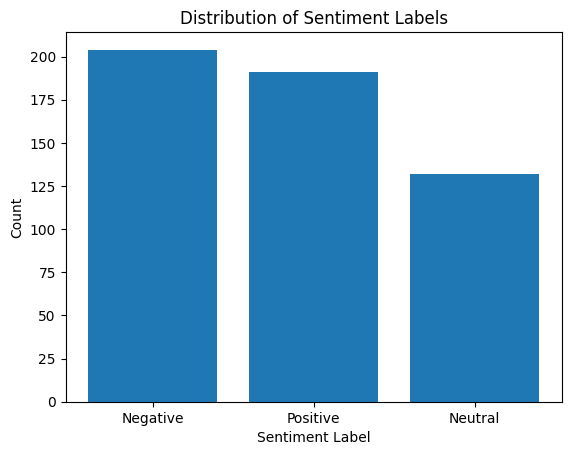

In [ ]:
# Hitung jumlah setiap label sentimen
sentiment_counts = data_df['Label'].value_counts()

# Buat plot batang
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels')
plt.show()

In [ ]:
data_df.head()

,no,author,comment,apiVersion,script,id,name,likelyGender,genderScale,score,probabilityCalibrated,Sentiment_Score,Label
0,1,riyanatkinson,parkir jakarta pakai emoney flazz brizzi kartu...,namsor_api_2.0.30,LATIN,e47edeb6-12ef-4672-86a2-3b5bd793a521,riyanatkinson,male,-0.354071,3.128930,0.677035,-2,Negative
1,2,aeldy rn,bayar gopay dana sopipay,namsor_api_2.0.30,LATIN,9636a1b4-ee98-4432-a1d7-acbb9ceb2d36,aeldy rn,female,0.066888,0.775960,0.533444,2,Positive
2,3,tatan t,pembayaran termudah pakai qris,namsor_api_2.0.30,LATIN,e9f99de2-864a-428d-9f20-27edc0812443,tatan t,male,-0.512525,6.122138,0.756263,0,Neutral
3,4,bandar absyar,bismillah bisaaa,namsor_api_2.0.30,LATIN,5a177f21-f048-4be4-b657-db5bcde50dfa,bandar absyar,male,-0.788357,8.080020,0.894179,4,Positive
4,5,betina gemoy,berharap parkir sepeda motor ponorogo jawa tim...,namsor_api_2.0.30,LATIN,1c1a3eaf-7225-4928-9026-30d7ec02a1f4,betina gemoy,female,0.716831,7.413761,0.858415,2,Positive


In [ ]:
data_df.to_csv('DATA-ind[label].csv', index=False)

**Setelah Mendapatkan label pada dataset berbahasa indonesia selanjutnya data asli dan data berbahasa inggris ditambahkan kolom label sentimen dan score berdasarkan Inset[MANUAL DI EXCEL]**

SETELAH PROSES INI MENGHASILKAN 3 DATA UNTUK PROSES PERCOBAAN SELANJUTNYA :
*   DATA-clean[label].csv untuk percobaan 1
*   DATA-ind[label] untuk percobaan 2
*   DATA-eng[label] untuk percobaan 3




# PERCOBAAN 1

In [ ]:
!pip install transformers
from transformers import BertTokenizer

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# Load data
df1 = pd.read_csv('/content/DATA-clean[label].csv')
df1.head()

,no,author,comment,apiVersion,script,id,name,likelyGender,genderScale,score,probabilityCalibrated,Sentiment_Score,Label
0,1,riyanatkinson,jakarta e parking pakai e money flazz brizzi k...,namsor_api_2.0.30,LATIN,e47edeb6-12ef-4672-86a2-3b5bd793a521,riyanatkinson,male,-0.354071,3.128930,0.677035,-2,Negative
1,2,aeldy rn,bayar pakek gopaydana opo sopipay,namsor_api_2.0.30,LATIN,9636a1b4-ee98-4432-a1d7-acbb9ceb2d36,aeldy rn,female,0.066888,0.775960,0.533444,2,Positive
2,3,tatan t,pembayaran gampang jane gae qris,namsor_api_2.0.30,LATIN,e9f99de2-864a-428d-9f20-27edc0812443,tatan t,male,-0.512525,6.122138,0.756263,0,Neutral
3,4,bandar absyar,gak tdk bismillah bisaaa,namsor_api_2.0.30,LATIN,5a177f21-f048-4be4-b657-db5bcde50dfa,bandar absyar,male,-0.788357,8.080020,0.894179,4,Positive
4,5,betina gemoy,wkwk brharap parikir motor ponorogo jawa timur...,namsor_api_2.0.30,LATIN,1c1a3eaf-7225-4928-9026-30d7ec02a1f4,betina gemoy,female,0.716831,7.413761,0.858415,2,Positive


In [ ]:
df1 = df1.drop(['no', 'Sentiment_Score', 'author','name', 'apiVersion', 'script', 'id', 'likelyGender', 'score', 'genderScale', 'probabilityCalibrated'], axis=1)
print(df1.head())

                                             comment     Label
0  jakarta e parking pakai e money flazz brizzi k...  Negative
1                  bayar pakek gopaydana opo sopipay  Positive
2                   pembayaran gampang jane gae qris   Neutral
3                           gak tdk bismillah bisaaa  Positive
4  wkwk brharap parikir motor ponorogo jawa timur...  Positive


In [ ]:
df1['Label'] = df1['Label'].map({'Negative': 0, 'Positive': 2, 'Neutral': 1})
df1.head()

,comment,Label
0,jakarta e parking pakai e money flazz brizzi k...,0
1,bayar pakek gopaydana opo sopipay,2
2,pembayaran gampang jane gae qris,1
3,gak tdk bismillah bisaaa,2
4,wkwk brharap parikir motor ponorogo jawa timur...,2


## MODELING

## Tokenisasi

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
# Custom Dataset
class CustomDataset1(Dataset):
    def __init__(self, df1, tokenizer, max_len):
        self.df1 = df1
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.df1)

    def __getitem__(self, idx):
        comment = str(self.df1.iloc[idx]['comment'])
        label = self.df1.iloc[idx]['Label']
        encoding = self.tokenizer.encode_plus(
            comment,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'comment_text': comment,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(label, dtype=torch.long)
        }

## Split Data

In [ ]:
# Parameters
MAX_LEN = 250
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
BATCH_SIZE = 16

# Train-test split
df1_train, df1_val = train_test_split(df1, test_size=0.2, random_state=42)

# Datasets
train_dataset = CustomDataset1(df1_train, tokenizer, MAX_LEN)
val_dataset = CustomDataset1(df1_val, tokenizer, MAX_LEN)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)


In [ ]:
df1_train.to_csv('df1_train.csv', index=False)
df1_val.to_csv('df1_val.csv', index=False)

## Modeling

In [ ]:
import torch.nn as nn
from transformers import AdamW, get_linear_schedule_with_warmup
from transformers import BertForSequenceClassification

# Initialize model
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=3)
model = model.to(device)
# Optimizer dan Loss function
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
loss_fn = nn.CrossEntropyLoss().to(device)
# Scheduler
EPOCHS = 5
total_steps = len(train_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)
# Training loop
def train_epoch1(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()
    losses = []
    correct_predictions = 0

    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        _, preds = torch.max(outputs.logits, dim=1)
        loss = loss_fn(outputs.logits, targets)

        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        scheduler.step()

    return correct_predictions.double() / n_examples, np.mean(losses)

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## EVALUASI

In [ ]:
def eval_model1(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()
    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            _, preds = torch.max(outputs.logits, dim=1)

            loss = loss_fn(outputs.logits, targets)

            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())

    return correct_predictions.double() / n_examples, np.mean(losses)

# Inference function
def get_predictions1(model, data_loader):
    model = model.eval()

    predictions = []
    prediction_probs = []
    real_values = []

    with torch.no_grad():
        for d in data_loader:
            texts = d["comment_text"]
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            _, preds = torch.max(outputs.logits, dim=1)

            probs = nn.functional.softmax(outputs.logits, dim=1)

            predictions.extend(preds)
            prediction_probs.extend(probs)
            real_values.extend(targets)

    predictions = torch.stack(predictions).cpu()
    prediction_probs = torch.stack(prediction_probs).cpu()
    real_values = torch.stack(real_values).cpu()
    return texts, predictions, prediction_probs, real_values


In [ ]:
# Training loop

for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 10)

    train_acc, train_loss = train_epoch1(
        model,
        train_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(df1_train)
    )

    print(f'Train loss {train_loss} accuracy {train_acc}')

    val_acc, val_loss = eval_model1(
        model,
        val_loader,
        loss_fn,
        device,
        len(df1_val)
    )

    print(f'Val   loss {val_loss} accuracy {val_acc}')
    print()

Epoch 1/5
----------


In [ ]:
def predictions1(model, data_loader):
    model = model.eval()
    predictions = []
    real_values = []

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            _, preds = torch.max(outputs.logits, dim=1)

            predictions.extend(preds)
            real_values.extend(targets)

    predictions = torch.stack(predictions).cpu()
    real_values = torch.stack(real_values).cpu()
    return predictions, real_values

y_pred1, y_test1 = predictions1(model, val_loader)
print(classification_report(y_test1, y_pred1))
print(confusion_matrix(y_test1, y_pred1))

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test1, y_pred1)

# Plot Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [ ]:
# Get predictions for the entire dataset
all_predictions, _ = predictions1(model, DataLoader(CustomDataset1(df1, tokenizer, MAX_LEN), batch_size=BATCH_SIZE))

# Add predictions to the DataFrame
df1['predicted_sentiment'] = all_predictions.numpy()

# Save the DataFrame to a CSV file
df1.to_csv('data_with_predictions.csv', index=False)


# PERCOBAAN 2

In [ ]:
!pip install transformers
from transformers import BertTokenizer

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# Load data
df2 = pd.read_csv('/content/DATA-ind[label].csv')
print(df2.head())

In [ ]:
df2 = df2.drop(['no', 'Sentiment_Score', 'author','name', 'apiVersion', 'script', 'id', 'likelyGender', 'score', 'genderScale', 'probabilityCalibrated'], axis=1)
print(df2.head())

In [ ]:
df2['Label'] = df2['Label'].map({'Negative': 0, 'Positive': 2, 'Neutral': 1})
print(df2.head())

## MODELING

## Tokenisasi

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

In [ ]:
# Custom Dataset
class CustomDataset2(Dataset):
    def __init__(self, df2, tokenizer, max_len):
        self.df2 = df2
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.df2)

    def __getitem__(self, idx):
        comment = str(self.df2.iloc[idx]['comment'])
        label = self.df2.iloc[idx]['Label']
        encoding = self.tokenizer.encode_plus(
            comment,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'comment_text': comment,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(label, dtype=torch.long)
        }

## Split Data

In [ ]:
# Parameters
MAX_LEN = 250
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
BATCH_SIZE = 16

# Train-test split
df2_train, df2_val = train_test_split(df2, test_size=0.2, random_state=42)

# Datasets
train_dataset = CustomDataset2(df2_train, tokenizer, MAX_LEN)
val_dataset = CustomDataset2(df2_val, tokenizer, MAX_LEN)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

## Modelling

In [ ]:
import torch.nn as nn
from transformers import AdamW, get_linear_schedule_with_warmup

# Initialize model
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=3)
model = model.to(device)

# Optimizer and Loss function
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
loss_fn = nn.CrossEntropyLoss().to(device)

# Scheduler
EPOCHS = 5
total_steps = len(train_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# Training loop
def train_epoch2(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()
    losses = []
    correct_predictions = 0

    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        _, preds = torch.max(outputs.logits, dim=1)
        loss = loss_fn(outputs.logits, targets)

        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        scheduler.step()

    return correct_predictions.double() / n_examples, np.mean(losses)


## EVALUASI

In [ ]:
import numpy as np
def eval_model2(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()
    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            _, preds = torch.max(outputs.logits, dim=1)

            loss = loss_fn(outputs.logits, targets)

            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())

    return correct_predictions.double() / n_examples, np.mean(losses)

# Inference function
def get_predictions2(model, data_loader):
    model = model.eval()

    predictions = []
    prediction_probs = []
    real_values = []

    with torch.no_grad():
        for d in data_loader:
            texts = d["comment_text"]
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            _, preds = torch.max(outputs.logits, dim=1)

            probs = nn.functional.softmax(outputs.logits, dim=1)

            predictions.extend(preds)
            prediction_probs.extend(probs)
            real_values.extend(targets)

    predictions = torch.stack(predictions).cpu()
    prediction_probs = torch.stack(prediction_probs).cpu()
    real_values = torch.stack(real_values).cpu()
    return texts, predictions, prediction_probs, real_values


In [ ]:
# Training loop
for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 10)

    train_acc, train_loss = train_epoch2(
        model,
        train_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(df2_train)
    )

    print(f'Train loss {train_loss} accuracy {train_acc}')

    val_acc, val_loss = eval_model2(
        model,
        val_loader,
        loss_fn,
        device,
        len(df2_val)
    )

    print(f'Val   loss {val_loss} accuracy {val_acc}')
    print()


In [ ]:
def predictions2(model, data_loader):
    model = model.eval()
    predictions = []
    real_values = []

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            _, preds = torch.max(outputs.logits, dim=1)

            predictions.extend(preds)
            real_values.extend(targets)

    predictions = torch.stack(predictions).cpu()
    real_values = torch.stack(real_values).cpu()
    return predictions, real_values

y_pred2, y_test2 = predictions2(model, val_loader)
print(classification_report(y_test2, y_pred2))
print(confusion_matrix(y_test2, y_pred2))


In [ ]:
import matplotlib.pyplot as plt
# Assuming y_pred and y_test are defined from the previous code

# Confusion Matrix
cm = confusion_matrix(y_test2, y_pred2)

# Plot Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [ ]:
all_predictions, _ = predictions2(model, DataLoader(CustomDataset2(df2, tokenizer, MAX_LEN), batch_size=BATCH_SIZE))

# Add predictions to the DataFrame
df['predicted_sentiment'] = all_predictions.numpy()

# Save the DataFrame to a CSV file
df2.to_csv('data_with_predictions2.csv', index=False)
df2_train.to_csv('df2_train.csv', index=False)
df2_val.to_csv('df2_val.csv', index=False)

In [ ]:
from google.colab import files

files.download('bert_model2.pth')


# PERCOBAAN 3

In [ ]:
!pip install transformers
from transformers import BertTokenizer

In [ ]:
df3 = pd.read_csv('/content/DATA-eng[label].csv')
print(df3.head())

In [ ]:
df3 = df3.drop(['no', 'Sentiment_Score', 'author','name', 'apiVersion', 'script', 'id', 'likelyGender', 'score', 'genderScale', 'probabilityCalibrated'], axis=1)
print(df3.head())

In [ ]:
df3['Label'] = df3['Label'].map({'Negative': 0, 'Positive': 2, 'Neutral': 1})
print(df3.head())

## MODELING

## Tokenisasi

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

In [ ]:
# Custom Dataset
class CustomDataset3(Dataset):
    def __init__(self, df3, tokenizer, max_len):
        self.df3 = df3
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.df3)

    def __getitem__(self, idx):
        comment = str(self.df3.iloc[idx]['comment'])
        label = self.df3.iloc[idx]['Label']
        encoding = self.tokenizer.encode_plus(
            comment,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'comment_text': comment,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(label, dtype=torch.long)
        }

## Split Data

In [ ]:
# Parameters
MAX_LEN = 250
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
BATCH_SIZE = 16

# Train-test split
df3_train, df3_val = train_test_split(df3, test_size=0.2, random_state=42)

# Datasets
train_dataset = CustomDataset3(df3_train, tokenizer, MAX_LEN)
val_dataset = CustomDataset3(df3_val, tokenizer, MAX_LEN)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

## Modelling

In [ ]:
import torch.nn as nn
from transformers import AdamW, get_linear_schedule_with_warmup

# Initialize model
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=3)
model = model.to(device)

# Optimizer and Loss function
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
loss_fn = nn.CrossEntropyLoss().to(device)

# Scheduler
EPOCHS = 5
total_steps = len(train_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# Training loop
def train_epoch3(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()
    losses = []
    correct_predictions = 0

    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        _, preds = torch.max(outputs.logits, dim=1)
        loss = loss_fn(outputs.logits, targets)

        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        scheduler.step()

    return correct_predictions.double() / n_examples, np.mean(losses)

## EVALUASI

In [ ]:
import numpy as np
def eval_model3(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()
    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            _, preds = torch.max(outputs.logits, dim=1)

            loss = loss_fn(outputs.logits, targets)

            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())

    return correct_predictions.double() / n_examples, np.mean(losses)

# Inference function
def get_predictions3(model, data_loader):
    model = model.eval()

    predictions = []
    prediction_probs = []
    real_values = []

    with torch.no_grad():
        for d in data_loader:
            texts = d["comment_text"]
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            _, preds = torch.max(outputs.logits, dim=1)

            probs = nn.functional.softmax(outputs.logits, dim=1)

            predictions.extend(preds)
            prediction_probs.extend(probs)
            real_values.extend(targets)

    predictions = torch.stack(predictions).cpu()
    prediction_probs = torch.stack(prediction_probs).cpu()
    real_values = torch.stack(real_values).cpu()
    return texts, predictions, prediction_probs, real_values


In [ ]:
# Training loop
for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 10)

    train_acc, train_loss = train_epoch3(
        model,
        train_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(df3_train)
    )

    print(f'Train loss {train_loss} accuracy {train_acc}')

    val_acc, val_loss = eval_model3(
        model,
        val_loader,
        loss_fn,
        device,
        len(df3_val)
    )

    print(f'Val   loss {val_loss} accuracy {val_acc}')
    print()


In [ ]:
def predictions3(model, data_loader):
    model = model.eval()
    predictions = []
    real_values = []

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            _, preds = torch.max(outputs.logits, dim=1)

            predictions.extend(preds)
            real_values.extend(targets)

    predictions = torch.stack(predictions).cpu()
    real_values = torch.stack(real_values).cpu()
    return predictions, real_values

y_pred3, y_test3 = predictions3(model, val_loader)
print(classification_report(y_test3, y_pred3))
print(confusion_matrix(y_test3, y_pred3))


In [ ]:
import matplotlib.pyplot as plt
# Assuming y_pred and y_test are defined from the previous code

# Confusion Matrix
cm = confusion_matrix(y_test3, y_pred3)

# Plot Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# BACK-TRANSLATION


In [ ]:
df4 = pd.read_csv('/content/DATA-ind[label].csv')
df4.head()
df4.shape

(527, 13)

In [ ]:
import pandas as pd
from googletrans import Translator

# Inisialisasi translator
translator = Translator()

# Fungsi back translation
def back_translate(text):
    translated = translator.translate(text, dest='en')
    back_translated = translator.translate(translated.text, dest='id')
    translated2 = translator.translate(back_translated.text, dest='en')
    return translated2.text

# Fungsi untuk augmentasi data dengan backtranslation
def augmentasi(df4, column_name, num_augmentations=2):
    augmented_df = df4.copy()

    for _ in range(num_augmentations):
        new_rows = []
        for _, row in df4.iterrows():
            original_text = row[column_name]
            try:
                # Terjemahkan dengan backtranslation
                back_translated_text = back_translate(original_text)
                new_row = row.copy()
                new_row[column_name] = back_translated_text
                new_rows.append(new_row)
            except Exception as e:
                print(f"Error dalam proses backtranslation: {e}")

        # Tambahkan baris baru hasil augmentasi ke augmented_df
        augmented_df = pd.concat([augmented_df, pd.DataFrame(new_rows)], ignore_index=True)

    return augmented_df
augmented_df = augmentasi(df4, 'comment', 2)
print(augmented_df)

       no              author  \
0       1       riyanatkinson   
1       2            aeldy rn   
2       3             tatan t   
3       4       bandar absyar   
4       5       betina  gemoy   
...   ...                 ...   
1576  534          Reni qm ol   
1577  535     user nk zu no y   
1578  536   adityapratama       
1579  537        Chank fanaya   
1580  538           Nastar      

                                                comment         apiVersion  \
0     parkir jakarta pakai emoney flazz brizzi kartu...  namsor_api_2.0.30   
1                              bayar gopay dana sopipay  namsor_api_2.0.30   
2                        pembayaran termudah pakai qris  namsor_api_2.0.30   
3                                      bismillah bisaaa  namsor_api_2.0.30   
4     berharap parkir sepeda motor ponorogo jawa tim...  namsor_api_2.0.30   
...                                                 ...                ...   
1576           supports your parking electronic parking  

In [ ]:
augmented_df.to_csv('new_data.csv', index=False)
augmented_df.shape

(1581, 13)

# PERCOBAAN 4

In [ ]:
!pip install transformers
from transformers import BertTokenizer

In [ ]:
import transformers
from transformers import BertTokenizer, BertModel, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

# Misc.
import warnings
warnings.filterwarnings('ignore')
# Load data
df5 = pd.read_csv('/content/new_data.csv')
print(df5.head())

   no         author                                            comment  \
0   1  riyanatkinson  parkir jakarta pakai emoney flazz brizzi kartu...   
1   2       aeldy rn                           bayar gopay dana sopipay   
2   3        tatan t                     pembayaran termudah pakai qris   
3   4  bandar absyar                                   bismillah bisaaa   
4   5  betina  gemoy  berharap parkir sepeda motor ponorogo jawa tim...   

          apiVersion script                                    id  \
0  namsor_api_2.0.30  LATIN  e47edeb6-12ef-4672-86a2-3b5bd793a521   
1  namsor_api_2.0.30  LATIN  9636a1b4-ee98-4432-a1d7-acbb9ceb2d36   
2  namsor_api_2.0.30  LATIN  e9f99de2-864a-428d-9f20-27edc0812443   
3  namsor_api_2.0.30  LATIN  5a177f21-f048-4be4-b657-db5bcde50dfa   
4  namsor_api_2.0.30  LATIN  1c1a3eaf-7225-4928-9026-30d7ec02a1f4   

            name likelyGender  genderScale     score  probabilityCalibrated  \
0  riyanatkinson         male    -0.354071  3.128930   

In [ ]:
df5 = df5.drop(['no', 'Sentiment_Score', 'author','name', 'apiVersion', 'script', 'id', 'likelyGender', 'score', 'genderScale', 'probabilityCalibrated'], axis=1)
print(df5.head())

                                             comment     Label
0  parkir jakarta pakai emoney flazz brizzi kartu...  Negative
1                           bayar gopay dana sopipay  Positive
2                     pembayaran termudah pakai qris   Neutral
3                                   bismillah bisaaa  Positive
4  berharap parkir sepeda motor ponorogo jawa tim...  Positive


In [ ]:
df5['Label'] = df5['Label'].map({'Negative': 0, 'Positive': 2, 'Neutral': 1})
print(df5.head())

                                             comment  Label
0  parkir jakarta pakai emoney flazz brizzi kartu...      0
1                           bayar gopay dana sopipay      2
2                     pembayaran termudah pakai qris      1
3                                   bismillah bisaaa      2
4  berharap parkir sepeda motor ponorogo jawa tim...      2


## MODELING

## Tokenisasi

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

In [ ]:
# Custom Dataset
class CustomDataset5(Dataset):
    def __init__(self, df5, tokenizer, max_len):
        self.df5 = df5
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.df5)

    def __getitem__(self, idx):
        comment = str(self.df5.iloc[idx]['comment'])
        label = self.df5.iloc[idx]['Label']
        encoding = self.tokenizer.encode_plus(
            comment,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'comment_text': comment,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(label, dtype=torch.long)
        }

## Split Data dan Hyperparameter tunning

In [ ]:
# Parameters
MAX_LEN = 250
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
BATCH_SIZE = 16

# Train-test split
df5_train, df5_val = train_test_split(df5, test_size=0.2, random_state=42)

# Datasets
train_dataset = CustomDataset5(df5_train, tokenizer, MAX_LEN)
val_dataset = CustomDataset5(df5_val, tokenizer, MAX_LEN)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)


## Modelling

In [ ]:
import torch.nn as nn
from transformers import AdamW, get_linear_schedule_with_warmup

# Initialize model
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=3)
model = model.to(device)

# Optimizer and Loss function
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
loss_fn = nn.CrossEntropyLoss().to(device)

# Scheduler
EPOCHS = 5
total_steps = len(train_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# Training loop
def train_epoch5(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()
    losses = []
    correct_predictions = 0

    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        _, preds = torch.max(outputs.logits, dim=1)
        loss = loss_fn(outputs.logits, targets)

        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        scheduler.step()

    return correct_predictions.double() / n_examples, np.mean(losses)



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## EVALUASI

In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()
    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            _, preds = torch.max(outputs.logits, dim=1)

            loss = loss_fn(outputs.logits, targets)

            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())

    return correct_predictions.double() / n_examples, np.mean(losses)

# Inference function
def get_predictions(model, data_loader):
    model = model.eval()

    predictions = []
    prediction_probs = []
    real_values = []

    with torch.no_grad():
        for d in data_loader:
            texts = d["comment_text"]
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            _, preds = torch.max(outputs.logits, dim=1)

            probs = nn.functional.softmax(outputs.logits, dim=1)

            predictions.extend(preds)
            prediction_probs.extend(probs)
            real_values.extend(targets)

    predictions = torch.stack(predictions).cpu()
    prediction_probs = torch.stack(prediction_probs).cpu()
    real_values = torch.stack(real_values).cpu()
    return texts, predictions, prediction_probs, real_values


In [ ]:
# Training loop
for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 10)

    train_acc, train_loss = train_epoch5(
        model,
        train_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(df5_train)
    )

    print(f'Train loss {train_loss} accuracy {train_acc}')

    val_acc, val_loss = eval_model(
        model,
        val_loader,
        loss_fn,
        device,
        len(df5_val)
    )

    print(f'Val   loss {val_loss} accuracy {val_acc}')
    print()


In [ ]:
def predictions(model, data_loader):
    model = model.eval()
    predictions = []
    real_values = []

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            _, preds = torch.max(outputs.logits, dim=1)

            predictions.extend(preds)
            real_values.extend(targets)

    predictions = torch.stack(predictions).cpu()
    real_values = torch.stack(real_values).cpu()
    return predictions, real_values

y_pred5, y_test5 = get_predictions(model, val_loader)
print(classification_report(y_test5, y_pred5))
print(confusion_matrix(y_test5, y_pred5))

In [ ]:
torch.save(model.state_dict(), 'sentiment_modelbert.pth')

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test5, y_pred5)

# Plot Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
# Get predictions for the entire dataset
all_predictions5 = get_predictions(model, DataLoader(CustomDataset5(df5, tokenizer, MAX_LEN), batch_size=BATCH_SIZE))

# Add predictions to the DataFrame
df5['predicted_sentiment'] = all_predictions.numpy()

# Save the DataFrame to a CSV file
df5.to_csv('data_with_predictions.csv', index=False)
df5_train.to_csv('train_data.csv', index=False)
df5_val.to_csv('val_data.csv', index=False)

# EXPLAROTARY

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/DATA-clean[label].csv')

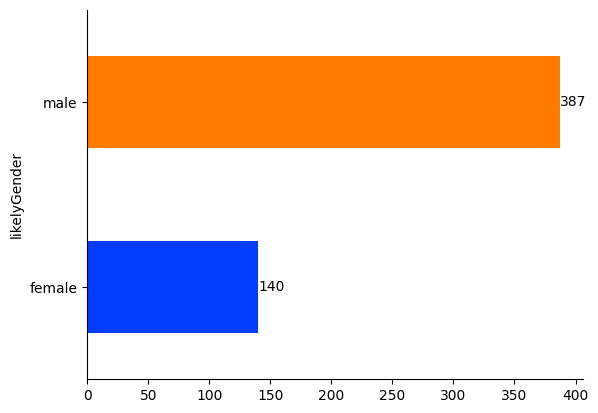

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

ax = df.groupby('likelyGender').size().plot(kind='barh', color=sns.color_palette('bright'))
ax.spines[['top', 'right',]].set_visible(False)

for i in ax.containers:
    ax.bar_label(i, fmt='%d', label_type='edge')

plt.show()

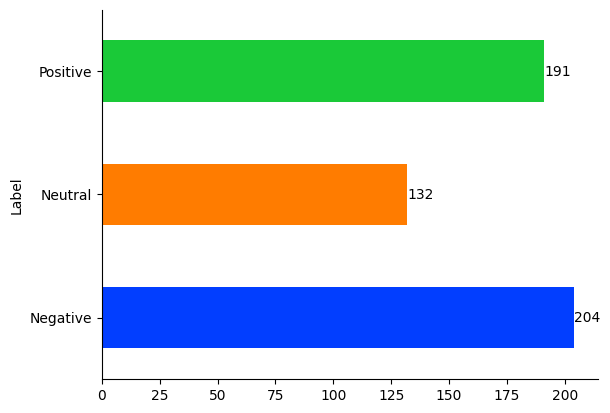

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd # Make sure pandas is imported

# Assuming df is the correct DataFrame, replace _df_20 with df
ax = df.groupby('Label').size().plot(kind='barh', color=sns.color_palette('bright'))
ax.spines[['top', 'right',]].set_visible(False)
# Menambahkan angka di atas setiap batang
for i in ax.containers:
    ax.bar_label(i, fmt='%d', label_type='edge')

# Menampilkan plot
plt.show()

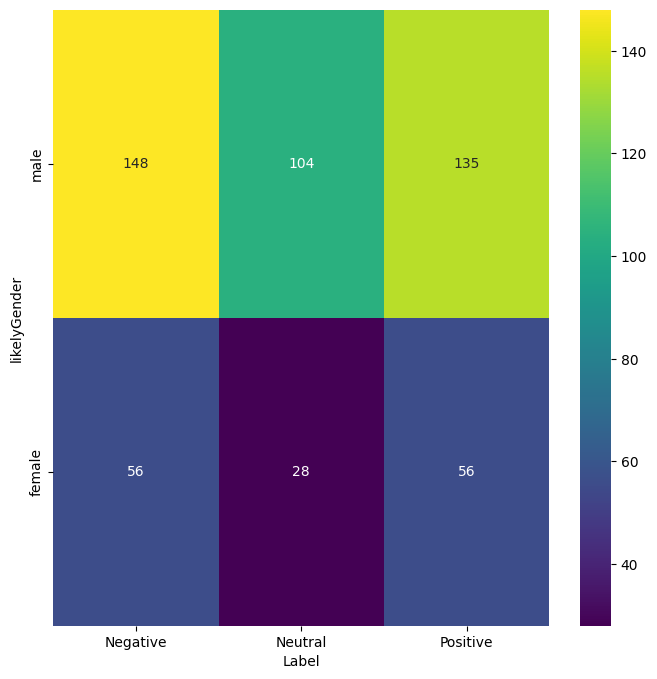

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.subplots(figsize=(8, 8))

df_2dhist = pd.DataFrame({
    x_label: grp['likelyGender'].value_counts()
    for x_label, grp in df.groupby('Label')
})

sns.heatmap(df_2dhist, cmap='viridis', annot=True, fmt='d')

plt.xlabel('Label')
plt.ylabel('likelyGender')
plt.show()

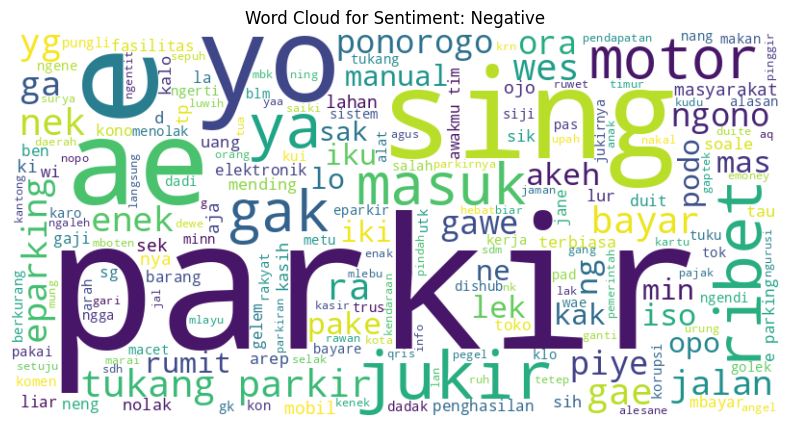

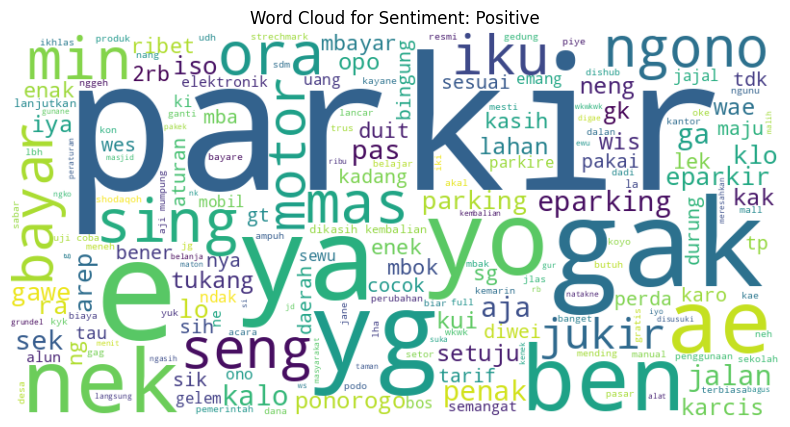

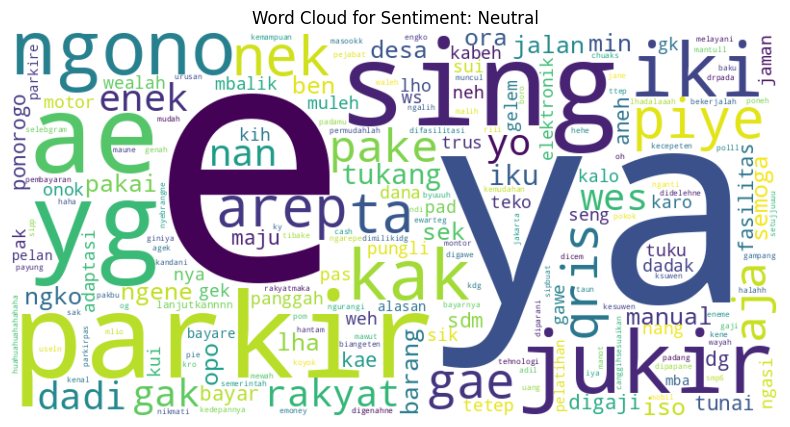

In [ ]:
from collections import defaultdict
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Create a dictionary to store comments for each sentiment
# Use '' as the default factory to store strings
sentiment_texts = defaultdict(str)
for _, row in df.iterrows():
    # Concatenate comments for each sentiment
    # Convert row['comment'] to a string before concatenating
    sentiment_texts[row['Label']] += " " + str(row['comment'])

# Generate and display word clouds for each sentiment
for sentiment, text in sentiment_texts.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Sentiment: {sentiment}")
    plt.axis("off")
    plt.show()